<a href="https://colab.research.google.com/github/tardigrades2/jupyter-notebook/blob/master/Pets_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.Change model name and config file name

In [1]:
# Pre-train model name to download
%env MODEL_NAME=ssd_mobilenet_v1_coco_2018_01_28

env: MODEL_NAME=ssd_mobilenet_v1_coco_2018_01_28


In [2]:
# Copy sample config file from model zoo, you can create a file for yourself
%env CONFIG_FILE=ssd_mobilenet_v1_focal_loss_pets

env: CONFIG_FILE=ssd_mobilenet_v1_focal_loss_pets


# 2.Install prerequisites
Follow: https://github.com/tensorflow/models/blob/master/research/object_detection/g3doc/installation.md


In [3]:
!apt-get install protobuf-compiler python-pil python-lxml python-tk
!pip install Cython
!pip install jupyter
!pip install matplotlib

Reading package lists... Done
Building dependency tree       
Reading state information... Done
python-tk is already the newest version (2.7.15~rc1-1).
protobuf-compiler is already the newest version (3.0.0-9.1ubuntu1).
The following package was automatically installed and is no longer required:
  libnvidia-common-410
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  python-bs4 python-chardet python-html5lib python-olefile
  python-pkg-resources python-six python-webencodings
Suggested packages:
  python-genshi python-lxml-dbg python-lxml-doc python-pil-doc python-pil-dbg
  python-setuptools
The following NEW packages will be installed:
  python-bs4 python-chardet python-html5lib python-lxml python-olefile
  python-pil python-pkg-resources python-six python-webencodings
0 upgraded, 9 newly installed, 0 to remove and 7 not upgraded.
Need to get 1,818 kB of archives.
After this operation, 7,688 kB of additional disk space will be used.
Get:1 http:/

In [4]:
!git clone https://github.com/tensorflow/models.git

Cloning into 'models'...
remote: Enumerating objects: 5, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 25916 (delta 0), reused 1 (delta 0), pack-reused 25911
Receiving objects: 100% (25916/25916), 508.53 MiB | 38.60 MiB/s, done.
Resolving deltas: 100% (15562/15562), done.
Checking out files: 100% (2907/2907), done.


In [5]:
!git clone https://github.com/cocodataset/cocoapi.git
!cd cocoapi/PythonAPI; make; cp -r pycocotools /content/models/research/

Cloning into 'cocoapi'...
remote: Enumerating objects: 953, done.
remote: Total 953 (delta 0), reused 0 (delta 0), pack-reused 953
Receiving objects: 100% (953/953), 11.70 MiB | 27.29 MiB/s, done.
Resolving deltas: 100% (566/566), done.
python setup.py build_ext --inplace
running build_ext
cythoning pycocotools/_mask.pyx to pycocotools/_mask.c
/usr/local/lib/python2.7/dist-packages/Cython/Compiler/Main.py:367: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /content/cocoapi/PythonAPI/pycocotools/_mask.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
building 'pycocotools._mask' extension
creating build
creating build/common
creating build/temp.linux-x86_64-2.7
creating build/temp.linux-x86_64-2.7/pycocotools
x86_64-linux-gnu-gcc -pthread -DNDEBUG -g -fwrapv -O2 -Wall -Wstrict-prototypes -fno-strict-aliasing -Wdate-time -D_FORTIFY_SOURCE=2 -g -fdebug-prefix-map=/build/python2.7-3hk45v/python2.7-2.7.15~rc1

In [6]:
cd /content/models/research

/content/models/research


In [7]:
%set_env PYTHONPATH=/content/models/research:/content/models/research/slim

env: PYTHONPATH=/content/models/research:/content/models/research/slim


In [0]:
!protoc object_detection/protos/*.proto --python_out=.

## Test the API

In [9]:
!python object_detection/builders/model_builder_test.py


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.

............s...
----------------------------------------------------------------------
Ran 16 tests in 0.073s

OK (skipped=1)


# 3.Prepare input data

## Get the oxford pets dataset

In [10]:
!wget http://www.robots.ox.ac.uk/~vgg/data/pets/data/images.tar.gz
!wget http://www.robots.ox.ac.uk/~vgg/data/pets/data/annotations.tar.gz
!tar -xvf images.tar.gz
!tar -xvf annotations.tar.gz

--2019-05-19 16:30:48--  http://www.robots.ox.ac.uk/~vgg/data/pets/data/images.tar.gz
Resolving www.robots.ox.ac.uk (www.robots.ox.ac.uk)... 129.67.94.2
Connecting to www.robots.ox.ac.uk (www.robots.ox.ac.uk)|129.67.94.2|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 791918971 (755M) [application/x-gzip]
Saving to: ‘images.tar.gz’

images.tar.gz       100%[===================>] 755.23M  29.8MB/s    in 26s     

2019-05-19 16:31:15 (29.0 MB/s) - ‘images.tar.gz’ saved [791918971/791918971]

--2019-05-19 16:31:16--  http://www.robots.ox.ac.uk/~vgg/data/pets/data/annotations.tar.gz
Resolving www.robots.ox.ac.uk (www.robots.ox.ac.uk)... 129.67.94.2
Connecting to www.robots.ox.ac.uk (www.robots.ox.ac.uk)|129.67.94.2|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19173078 (18M) [application/x-gzip]
Saving to: ‘annotations.tar.gz’

annotations.tar.gz  100%[===================>]  18.28M  14.5MB/s    in 1.3s    

2019-05-19 16:31:18 (14.5 MB/s)

## Build tfrecords

In [11]:
!python object_detection/dataset_tools/create_pet_tf_record.py \
    --label_map_path=object_detection/data/pet_label_map.pbtxt \
    --data_dir=`pwd` \
    --output_dir=`pwd`
!ls *.record*

/content/models/research/object_detection/utils/dataset_util.py:75: FutureWarning: The behavior of this method will change in future versions. Use specific 'len(elem)' or 'elem is not None' test instead.
  if not xml:
pet_faces_train.record-00000-of-00010  pet_faces_val.record-00000-of-00010
pet_faces_train.record-00001-of-00010  pet_faces_val.record-00001-of-00010
pet_faces_train.record-00002-of-00010  pet_faces_val.record-00002-of-00010
pet_faces_train.record-00003-of-00010  pet_faces_val.record-00003-of-00010
pet_faces_train.record-00004-of-00010  pet_faces_val.record-00004-of-00010
pet_faces_train.record-00005-of-00010  pet_faces_val.record-00005-of-00010
pet_faces_train.record-00006-of-00010  pet_faces_val.record-00006-of-00010
pet_faces_train.record-00007-of-00010  pet_faces_val.record-00007-of-00010
pet_faces_train.record-00008-of-00010  pet_faces_val.record-00008-of-00010
pet_faces_train.record-00009-of-00010  pet_faces_val.record-00009-of-00010


# 4.Prepare model and config

## Get the pre-trained model for transfer learning

In [12]:
!wget http://download.tensorflow.org/models/object_detection/${MODEL_NAME}.tar.gz
!tar -xvf ${MODEL_NAME}.tar.gz
!cp ${MODEL_NAME}/model.ckpt.* .

--2019-05-19 16:31:53--  http://download.tensorflow.org/models/object_detection/ssd_mobilenet_v1_coco_2018_01_28.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 108.177.111.128, 2607:f8b0:4001:c1b::80
Connecting to download.tensorflow.org (download.tensorflow.org)|108.177.111.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 76541073 (73M) [application/x-tar]
Saving to: ‘ssd_mobilenet_v1_coco_2018_01_28.tar.gz’

ssd_mobilenet_v1_co 100%[===================>]  73.00M   157MB/s    in 0.5s    

2019-05-19 16:31:54 (157 MB/s) - ‘ssd_mobilenet_v1_coco_2018_01_28.tar.gz’ saved [76541073/76541073]

ssd_mobilenet_v1_coco_2018_01_28/
ssd_mobilenet_v1_coco_2018_01_28/model.ckpt.index
ssd_mobilenet_v1_coco_2018_01_28/checkpoint
ssd_mobilenet_v1_coco_2018_01_28/pipeline.config
ssd_mobilenet_v1_coco_2018_01_28/model.ckpt.data-00000-of-00001
ssd_mobilenet_v1_coco_2018_01_28/model.ckpt.meta
ssd_mobilenet_v1_coco_2018_01_28/saved_model/
ssd_mobilenet_v1

## Get the config file and edit it to have the right directories

In [0]:
!cp object_detection/samples/configs/${CONFIG_FILE}.config .
# Change config file content
!sed -i "s|PATH_TO_BE_CONFIGURED|/content/models/research|g" ${CONFIG_FILE}.config
!sed -i "s|/content/models/research/pet_label_map.pbtxt|/content/models/research/object_detection/data/pet_label_map.pbtxt|g" ${CONFIG_FILE}.config
!sed -i "s|/content/models/research/pet_train.record|/content/models/research/pet_faces_train.record|g" ${CONFIG_FILE}.config
!sed -i "s|/content/models/research/pet_val.record|/content/models/research/pet_faces_val.record|g" ${CONFIG_FILE}.config

# 9*.Get pre-session train folder from GG Drive
(not run when this is first session of Colab)

In [14]:
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive


In [0]:
!cp "/gdrive/My Drive/train.tar.gz" "train.tar.gz"

In [16]:
!tar -xvf train.tar.gz

train/
train/model.ckpt-47145.meta
train/model.ckpt-44185.index
train/eval_0/
train/eval_0/events.out.tfevents.1557924355.84bba10230e2
train/model.ckpt-44185.data-00000-of-00001
train/model.ckpt-47145.data-00000-of-00001
train/model.ckpt-45653.meta
train/model.ckpt-42711.meta
train/model.ckpt-45653.index
train/graph.pbtxt
train/model.ckpt-41070.data-00000-of-00001
train/checkpoint
train/model.ckpt-44185.meta
train/model.ckpt-41070.index
train/model.ckpt-42711.index
train/model.ckpt-47145.index
train/events.out.tfevents.1557923673.84bba10230e2
train/model.ckpt-42711.data-00000-of-00001
train/model.ckpt-41070.meta
train/model.ckpt-45653.data-00000-of-00001


# 5.Run Tensorboard via ngrok

In [17]:
! wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
! unzip ngrok-stable-linux-amd64.zip

--2019-05-19 16:36:17--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 34.206.130.40, 52.55.191.55, 52.3.53.115, ...
Connecting to bin.equinox.io (bin.equinox.io)|34.206.130.40|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16648024 (16M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip’

ngrok-stable-linux- 100%[===================>]  15.88M  41.7MB/s    in 0.4s    

2019-05-19 16:36:17 (41.7 MB/s) - ‘ngrok-stable-linux-amd64.zip’ saved [16648024/16648024]

Archive:  ngrok-stable-linux-amd64.zip
  inflating: ngrok                   


In [0]:
get_ipython().system_raw('tensorboard --logdir /content/models/research --host 0.0.0.0 --port 6006 &')


In [0]:
get_ipython().system_raw('./ngrok http 6006 &')

In [20]:
! curl -s http://localhost:4040/api/tunnels | python3 -c \
    "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"

https://148b74eb.ngrok.io


# 6.Train the model

In [0]:
!mkdir train

In [0]:
!python /content/models/research/object_detection/model_main.py \
    --pipeline_config_path=/content/models/research/${CONFIG_FILE}.config \
    --model_dir=/content/models/research/train \
    --alsologtostderr \
    --num_train_steps=200000 \
    --num_eval_steps=1000

# 8*.Continue training in other session 
(run only if you want to continue train current in next session)

## Zip train folder to upload

In [0]:
!tar -zcvf train.tar.gz train

## Upload to Drive

In [0]:
# Install the PyDrive wrapper & import libraries.
# This only needs to be done once in a notebook.
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once in a notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
# Create & upload a file.
uploaded = drive.CreateFile({'title': 'train.tar.gz'})
uploaded.SetContentFile('train.tar.gz')
uploaded.Upload()
print('Uploaded file with ID {}'.format(uploaded.get('id')))

# 7.Download model

## Convert last checkpoint into a model


In [0]:
!rm -r  exported_graphs; mkdir exported_graphs

In [61]:
%env CHECKPOINT_NUMBER=47145

env: CHECKPOINT_NUMBER=47145


In [64]:
!python object_detection/export_inference_graph.py \
    --input_type image_tensor \
    --pipeline_config_path ${CONFIG_FILE}.config \
    --trained_checkpoint_prefix train/model.ckpt-${CHECKPOINT_NUMBER} \
    --output_directory exported_graphs

Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please switch to tf.train.get_or_create_global_step
Instructions for updating:
Use `tf.profiler.profile(graph, run_meta, op_log, cmd, options)`. Build `options` with `tf.profiler.ProfileOptionBuilder`. See README.md for details
Instructions for updating:
Use tf.compat.v1.graph_util.remove_training_nodes
219 ops no flops stats due to incomplete shapes.
Parsing Inputs...
Incomplete shape.

=========================Options=============================
-max_depth                  10000
-min_bytes                  0
-min_peak_bytes             0
-min_residual_bytes         0
-min_output_bytes           0
-min_micros                 0
-min_accelerator_micros     0
-min_cpu_micros             0
-min_params                 0
-min_float_ops              0
-min_occurrence             0
-step                       -1
-order_by                   name
-a

## Upload to GG Drive

### Compress the graph

In [0]:
!tar -zcvf exp_g.tar.gz exported_graphs

### Prepare for upload to GG Drive

In [0]:
# Install the PyDrive wrapper & import libraries.
# This only needs to be done once in a notebook.
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once in a notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

### Upload the file into GG Drive

In [0]:
# Create & upload a file.
uploaded = drive.CreateFile({'title': 'exp_g.tar.gz'})
uploaded.SetContentFile('exp_g.tar.gz')
uploaded.Upload()
print('Uploaded file with ID {}'.format(uploaded.get('id')))

# Utility cells

## Monitor the loss convergence without tensorboard

In [0]:
import tensorflow as tf
import re


for event in tf.train.summary_iterator('train/events.out.tfevents.1525935471.f00cf4d2a1b5'):
    for value in event.summary.value:
        if value.tag == 'Losses/Loss/RPNLoss/objectness_loss':
            if value.HasField('simple_value'):
                print(value.simple_value)

## Show how long you have use this session

In [0]:
!uptime

# Object Detection Demo

## Imports

In [0]:
import numpy as np
import os
import six.moves.urllib as urllib
import sys
import tarfile
import tensorflow as tf
import zipfile

from distutils.version import StrictVersion
from collections import defaultdict
from io import StringIO
from matplotlib import pyplot as plt
from PIL import Image

# This is needed since the notebook is stored in the object_detection folder.
sys.path.append("..")
from object_detection.utils import ops as utils_ops

if StrictVersion(tf.__version__) < StrictVersion('1.12.0'):
  raise ImportError('Please upgrade your TensorFlow installation to v1.12.*.')

## Env setup

In [0]:
# This is needed to display the images.
%matplotlib inline

## Object detection imports

In [0]:
from object_detection.utils import label_map_util

from object_detection.utils import visualization_utils as vis_util

# Model preparation

## Variables

In [0]:
PATH_TO_FROZEN_GRAPH = 'exported_graphs/frozen_inference_graph.pb'
PATH_TO_LABELS = os.path.join('object_detection/data', 'pet_label_map.pbtxt')


## Download Model

In [0]:
opener = urllib.request.URLopener()
opener.retrieve(DOWNLOAD_BASE + MODEL_FILE, MODEL_FILE)
tar_file = tarfile.open(MODEL_FILE)
for file in tar_file.getmembers():
  file_name = os.path.basename(file.name)
  if 'frozen_inference_graph.pb' in file_name:
    tar_file.extract(file, os.getcwd())

## Load a (frozen) Tensorflow model into memory.

In [0]:
detection_graph = tf.Graph()
with detection_graph.as_default():
  od_graph_def = tf.GraphDef()
  with tf.gfile.GFile(PATH_TO_FROZEN_GRAPH, 'rb') as fid:
    serialized_graph = fid.read()
    od_graph_def.ParseFromString(serialized_graph)
    tf.import_graph_def(od_graph_def, name='')

## Loading label map

In [0]:
category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS, use_display_name=True)

## Helper code

In [0]:
def load_image_into_numpy_array(image):
  (im_width, im_height) = image.size
  return np.array(image.getdata()).reshape(
      (im_height, im_width, 3)).astype(np.uint8)

# Detection

In [0]:
# For the sake of simplicity we will use only 2 images:
# image1.jpg
# image2.jpg
# If you want to test the code with your images, just add path to the images to the TEST_IMAGE_PATHS.
PATH_TO_TEST_IMAGES_DIR = 'object_detection/test_images'
TEST_IMAGE_PATHS = [ os.path.join(PATH_TO_TEST_IMAGES_DIR, 'image{}.jpg'.format(i)) for i in range(1, 3) ]

# Size, in inches, of the output images.
IMAGE_SIZE = (12, 8)

## Compute time to infer an image

In [74]:
import numpy as np
with detection_graph.as_default():
  with tf.Session(graph=detection_graph) as sess:
    # Definite input and output Tensors for detection_graph
    image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')
    # Each box represents a part of the image where a particular object was detected.
    detection_boxes = detection_graph.get_tensor_by_name('detection_boxes:0')
    # Each score represent how level of confidence for each of the objects.
    # Score is shown on the result image, together with the class label.
    detection_scores = detection_graph.get_tensor_by_name('detection_scores:0')
    detection_classes = detection_graph.get_tensor_by_name('detection_classes:0')
    num_detections = detection_graph.get_tensor_by_name('num_detections:0')
    i = 0
    time_array = np.zeros(100,)
    for _ in range(101):
      image_path = TEST_IMAGE_PATHS[0]
      i += 1
      image = Image.open(image_path)
      # the array based representation of the image will be used later in order to prepare the
      # result image with boxes and labels on it.
      image_np = load_image_into_numpy_array(image)
      # Expand dimensions since the model expects images to have shape: [1, None, None, 3]
      image_np_expanded = np.expand_dims(image_np, axis=0)
      # Actual detection.
      options = tf.RunOptions(trace_level=tf.RunOptions.FULL_TRACE)
      run_metadata = tf.RunMetadata()
      start_time = time.time()
      (boxes, scores, classes, num) = sess.run(
          [detection_boxes, detection_scores, detection_classes, num_detections],
          feed_dict={image_tensor: image_np_expanded})
      time_process = time.time()-start_time
      if i>1:
        time_array[i-2] = time_process 
      print('Iteration %d: %.3f sec'%(i, time_process))
    print(time_array)
    print('Time to process an image is: %.3f sec'%(time_array.mean()))

Iteration 1: 1.438 sec
Iteration 2: 0.035 sec
Iteration 3: 0.031 sec
Iteration 4: 0.033 sec
Iteration 5: 0.036 sec
Iteration 6: 0.033 sec
Iteration 7: 0.032 sec
Iteration 8: 0.034 sec
Iteration 9: 0.036 sec
Iteration 10: 0.035 sec
Iteration 11: 0.037 sec
Iteration 12: 0.033 sec
Iteration 13: 0.032 sec
Iteration 14: 0.048 sec
Iteration 15: 0.033 sec
Iteration 16: 0.034 sec
Iteration 17: 0.032 sec
Iteration 18: 0.031 sec
Iteration 19: 0.034 sec
Iteration 20: 0.035 sec
Iteration 21: 0.034 sec
Iteration 22: 0.032 sec
Iteration 23: 0.038 sec
Iteration 24: 0.036 sec
Iteration 25: 0.045 sec
Iteration 26: 0.038 sec
Iteration 27: 0.036 sec
Iteration 28: 0.036 sec
Iteration 29: 0.037 sec
Iteration 30: 0.043 sec
Iteration 31: 0.035 sec
Iteration 32: 0.039 sec
Iteration 33: 0.038 sec
Iteration 34: 0.037 sec
Iteration 35: 0.040 sec
Iteration 36: 0.035 sec
Iteration 37: 0.032 sec
Iteration 38: 0.032 sec
Iteration 39: 0.038 sec
Iteration 40: 0.036 sec
Iteration 41: 0.035 sec
Iteration 42: 0.032 sec
I

## Infer all images in an folder and show result

In [0]:
def run_inference_for_single_image(image, graph):
  with graph.as_default():
    with tf.Session() as sess:
      # Get handles to input and output tensors
      ops = tf.get_default_graph().get_operations()
      all_tensor_names = {output.name for op in ops for output in op.outputs}
      tensor_dict = {}
      for key in [
          'num_detections', 'detection_boxes', 'detection_scores',
          'detection_classes', 'detection_masks'
      ]:
        tensor_name = key + ':0'
        if tensor_name in all_tensor_names:
          tensor_dict[key] = tf.get_default_graph().get_tensor_by_name(
              tensor_name)
      if 'detection_masks' in tensor_dict:
        # The following processing is only for single image
        detection_boxes = tf.squeeze(tensor_dict['detection_boxes'], [0])
        detection_masks = tf.squeeze(tensor_dict['detection_masks'], [0])
        # Reframe is required to translate mask from box coordinates to image coordinates and fit the image size.
        real_num_detection = tf.cast(tensor_dict['num_detections'][0], tf.int32)
        detection_boxes = tf.slice(detection_boxes, [0, 0], [real_num_detection, -1])
        detection_masks = tf.slice(detection_masks, [0, 0, 0], [real_num_detection, -1, -1])
        detection_masks_reframed = utils_ops.reframe_box_masks_to_image_masks(
            detection_masks, detection_boxes, image.shape[1], image.shape[2])
        detection_masks_reframed = tf.cast(
            tf.greater(detection_masks_reframed, 0.5), tf.uint8)
        # Follow the convention by adding back the batch dimension
        tensor_dict['detection_masks'] = tf.expand_dims(
            detection_masks_reframed, 0)
      image_tensor = tf.get_default_graph().get_tensor_by_name('image_tensor:0')

      # Run inference
      output_dict = sess.run(tensor_dict,
                             feed_dict={image_tensor: image})

      # all outputs are float32 numpy arrays, so convert types as appropriate
      output_dict['num_detections'] = int(output_dict['num_detections'][0])
      output_dict['detection_classes'] = output_dict[
          'detection_classes'][0].astype(np.int64)
      output_dict['detection_boxes'] = output_dict['detection_boxes'][0]
      output_dict['detection_scores'] = output_dict['detection_scores'][0]
      if 'detection_masks' in output_dict:
        output_dict['detection_masks'] = output_dict['detection_masks'][0]
  return output_dict

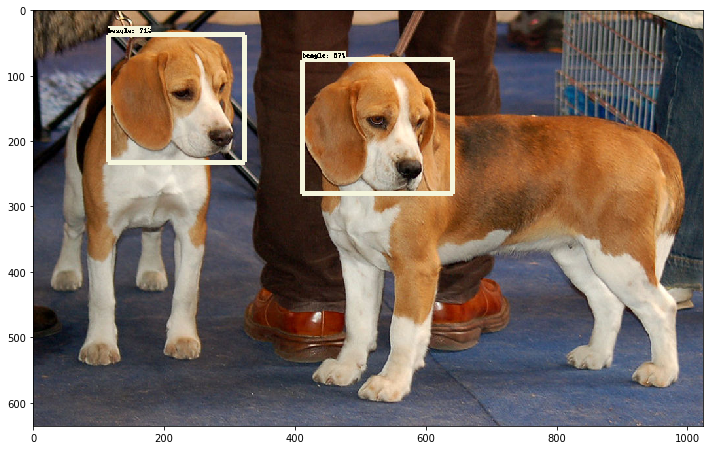

In [73]:
image_path = TEST_IMAGE_PATHS[0]
image = Image.open(image_path)
# the array based representation of the image will be used later in order to prepare the
# result image with boxes and labels on it.
image_np = load_image_into_numpy_array(image)
# Expand dimensions since the model expects images to have shape: [1, None, None, 3]
image_np_expanded = np.expand_dims(image_np, axis=0)
# Actual detection.
output_dict = run_inference_for_single_image(image_np_expanded, detection_graph)
# Visualization of the results of a detection.
vis_util.visualize_boxes_and_labels_on_image_array(
    image_np,
    output_dict['detection_boxes'],
    output_dict['detection_classes'],
    output_dict['detection_scores'],
    category_index,
    instance_masks=output_dict.get('detection_masks'),
    use_normalized_coordinates=True,
    line_thickness=8)
plt.figure(figsize=IMAGE_SIZE)
plt.imshow(image_np)